In [1]:
from collections import Counter
import json
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-3])
DATA_PATH = f'{ROOT_PATH}/AI_study/dataset/mcnicknames'

In [3]:
clear_name = lambda name: re.compile('[^a-zA-Z0-9_]').sub('', name)

In [4]:
df = pd.read_csv(f'{DATA_PATH}/nicknames.csv')
df = df.dropna()

In [5]:
nicknames = df['nicknames_s']
nicknames.head()

0        0
1       00
2      000
3     0000
4    00000
Name: nicknames_s, dtype: object

In [6]:
names       = ''.join([clear_name(name).lower() for name in nicknames])
alpha_count = Counter(names)
alpha_count.most_common(10)

[('a', 3564957),
 ('e', 3303318),
 ('r', 2553768),
 ('i', 2504072),
 ('o', 2418331),
 ('n', 2077960),
 ('t', 1899211),
 ('s', 1871014),
 ('l', 1834379),
 ('m', 1437298)]

In [7]:
keyboard_image = cv2.imread(f'{DATA_PATH}/keyboard.png')
H, W           = keyboard_image.shape[:2]

In [8]:
keycoords   = json.loads(open(f'{DATA_PATH}/buttons.json', 'r').read())
keycoords   = {key : list(map(int, value.split('-'))) for key, value in keycoords.items()}

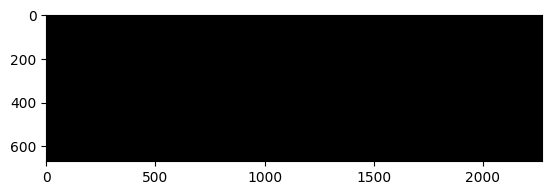

In [9]:
boards = np.zeros((H, W), dtype = np.uint8)
plt.imshow(boards, cmap = 'gray')

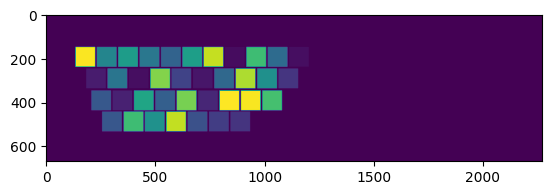

In [10]:
beta = 1e-2
for (alpha, count) in alpha_count.items():
    
    cx, cy = keycoords[alpha]
    count  = int(beta * count)
    
    boards[cy - 45 : cy + 45, cx - 45 : cx + 45] += count
    
plt.imshow(boards)